# Potential Talents

In [30]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
#loading the data
potential_talent=pd.read_excel('potential-talents.xlsx')
#Copy dataset
pt = potential_talent.copy()
pt.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [32]:
pt.shape

(104, 5)

In [33]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In [34]:
#Duplicated Rows
pt.loc[pt.duplicated(), :]
print(pt.duplicated().sum())

0


In [35]:
pt.isnull().sum()

id              0
job_title       0
location        0
connection      0
fit           104
dtype: int64

In [36]:
#Counting the number of 'unknown' string in the categorical columns
pt['job_title'].str.contains('unk').sum()

0

In [37]:
pt['location'].str.contains('unk').sum()

0

In [38]:
pt['connection'].str.contains('unk').sum()

0

In [39]:
# Basic stats for categorical columns
pt.describe(include=object)

,job_title,location,connection
count,104,104,104
unique,52,41,33
top,2019 C.T. Bauer College of Business Graduate (...,Kanada,500+
freq,7,12,44


### Data Exploration

In [40]:
#Unique job titles
pt.job_title.value_counts()

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
People Development Coordinator at Ryan                                                                                   6
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
HR Senior Specialist                                                                                                     5
Student at Chapman University                                                                                            4
SVP, C

In [41]:
#Location
pt.location.value_counts()

location
Kanada                                 12
Raleigh-Durham, North Carolina Area     8
Houston, Texas Area                     8
Greater New York City Area              7
Houston, Texas                          7
Denton, Texas                           6
San Francisco Bay Area                  5
Greater Philadelphia Area               5
İzmir, Türkiye                          4
Lake Forest, California                 4
Atlanta, Georgia                        4
Chicago, Illinois                       2
Austin, Texas Area                      2
Greater Atlanta Area                    2
Amerika Birleşik Devletleri             2
Long Beach, California                  1
Milpitas, California                    1
Greater Chicago Area                    1
Torrance, California                    1
Greater Los Angeles Area                1
Bridgewater, Massachusetts              1
Lafayette, Indiana                      1
Kokomo, Indiana Area                    1
Las Vegas, Nevada Area   

In [42]:
#Wordcloud for visualization
from wordcloud import WordCloud
def generate_word_cloud(column):
    job_text = " ".join(item for item in column)
    plt.figure(figsize=(10, 5))
    word_cloud = WordCloud(max_font_size=50, max_words=100, 
                           collocations=False, background_color="#b3cccc",).generate(job_text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

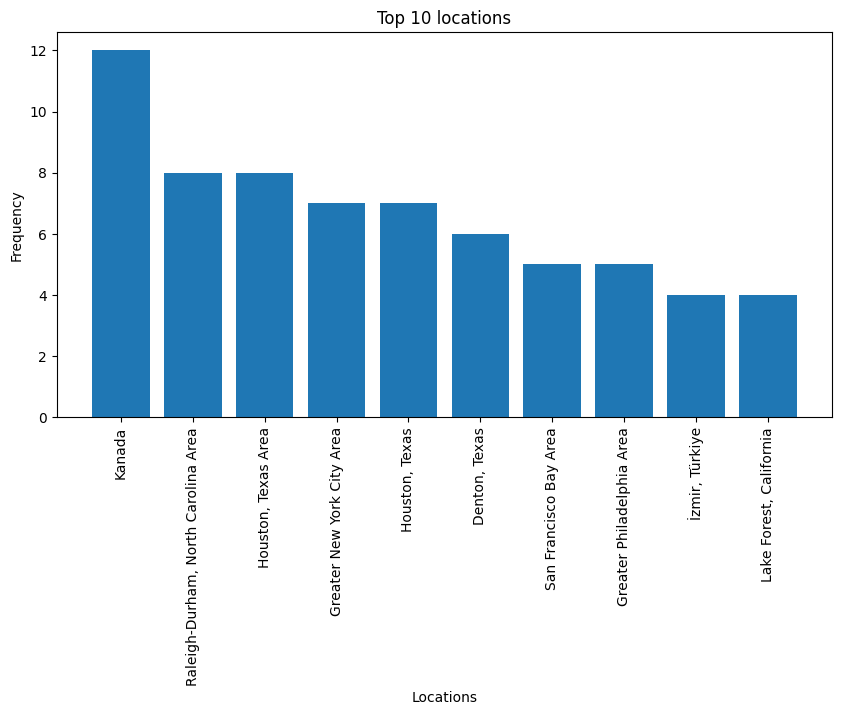

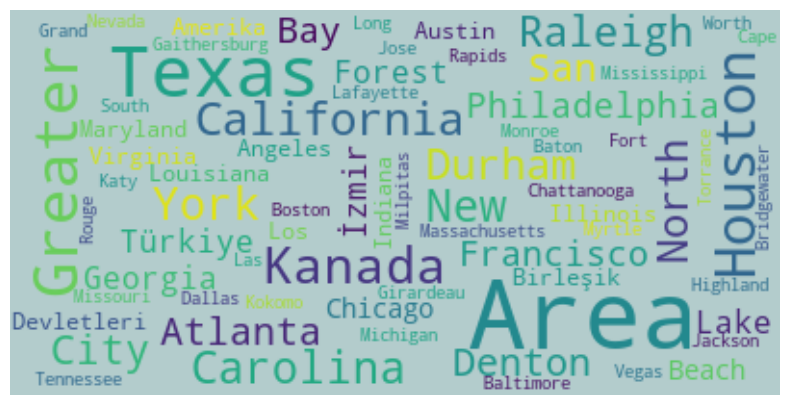

In [43]:
# Top 10 locations
plt.figure(figsize=(10, 5))
plt.bar(pt.location.value_counts().index[: 10], pt.location.value_counts()[: 10])
plt.xticks(rotation=90)
plt.title("Top 10 locations")
plt.xlabel("Locations")
plt.ylabel("Frequency")
plt.show()
    
generate_word_cloud(pt['location'])

### Data Cleaning

In [44]:
#Preprocessing function
import nltk, re
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
stemmer = PorterStemmer() 
lemmatizer=WordNetLemmatizer()

def clean_string(text, stem="None"):

    final_string = ""
    
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))

    # Remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # Make text lower case
    text = text.lower()
        
    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
   
    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]
    
    #Stemming & Lemmatization (pos='v' means verb)
    if stem == 'Stem':
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    else:
        text_stemmed = [lemmatizer.lemmatize(y,pos='v') for y in text_filtered]

    final_string = ' '.join(text_stemmed)
    
    # Removing whitespace from the start of the string
    final_string = final_string.lstrip()
    
    # Substituting multiple spaces with single space
    final_string = re.sub(r'\s+', ' ', final_string, flags=re.I)
    
    return final_string

pt['job_title']=pt['job_title'].apply(lambda x: clean_string(x))
pt.iloc[0]['job_title']

'bauer college business graduate magna cum laude aspire human resources professional'

In [45]:
#Correcting Spelling Error in the location column

pt['location']=pt['location'].str.replace("Türkiye","Turkey", regex=True)
pt['location']=pt['location'].str.replace("Kanada","Canada", regex=True)
pt['location']=pt['location'].str.replace("Amerika Birleşik Devletleri","United States of America", regex=True)
pt.head()


,id,job_title,location,connection,fit
0,1,bauer college business graduate magna cum laud...,"Houston, Texas",85,NaN
1,2,native english teacher epik english program korea,Canada,500+,NaN
2,3,aspire human resources professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,people development coordinator ryan,"Denton, Texas",500+,NaN
4,5,advisory board member celal bayar university,"İzmir, Turkey",500+,NaN


In [46]:
#replace abreviations by there real texts
pt.replace({'job_title' : { 'chro' : 'chief human resources officer', 'svp' : 'senior vice president'
        ,'gphr' : 'global professional in human resources','hris' : 'human resources information system'
        , 'csr' : 'corporate social responsibility', 'sphr' : 'Senior Professional in Human Resources'
        , 'hr' : 'human resources', 'rrp': 'recommended retail price'}}, regex=True, inplace=True)

In [47]:
#Unique job titles once again
pt.job_title.value_counts()

job_title
bauer college business graduate magna cum laude aspire human resources professional                                                                                                                                               7
aspire human resources professional                                                                                                                                                                                               7
student humber college aspire human resources generalist                                                                                                                                                                          7
people development coordinator ryan                                                                                                                                                                                               6
native english teacher epik english program korea                             

In [48]:
#Recovering top 10 words in job_titles
word_dict = {}

for i in pt['job_title']:
    for word in i.split(" "):
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] = word_dict[word] + 1
            
print("Top 10 frequently used words:")

pd.DataFrame({'Words': word_dict.keys(), 
              'Frequency': word_dict.values()}).sort_values(by=['Frequency'], ascending=False).head(10)

Top 10 frequently used words:


,Words,Frequency
9,resources,81
8,human,81
7,aspire,35
10,professional,24
28,student,16
32,seek,15
30,generalist,14
1,college,14
26,university,12
27,specialist,12


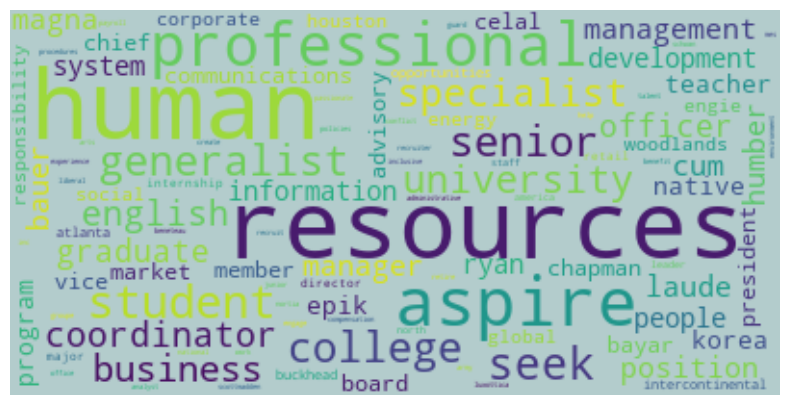

In [49]:
# WordCloud for job titles
generate_word_cloud(pt['job_title'])

#### The most common words in the job_title column are human, resources, aspire and professional.

## Ranking Candidates Based on a Fitness Score (Keywords)

In [50]:
#Applying TF-IDF (Term Frequency-Inverse Document Frequency) to calculate how relevant a word is.
#Cosine similarity gives a useful measure of how similar two documents (job titles in this case) are likely to be, 
#in terms of their subject matter, and independently of the length of the documents.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
ranking_pt=potential_talent.copy()

def rank_candidates_tfidf(keyword,ranking_pt,feature_name):
    #store cleaned rows into a list
    corpus=pt[feature_name].tolist()
    #apply preprocessing on keyword
    keyword=clean_string(keyword)
    #create an instance of tfidfVectorizer
    tfv = TfidfVectorizer()
    #Add the cleaned keyword to the corpus list 
    corpus.append(keyword)
    #fit the Tfidf vectorizer on the cleaned data
    key_tf=tfv.fit_transform(corpus)
    #create a dataframe that contains tfidf values of each token for each row in the data
    ## Get the feature names using the vocabulary_ attribute
    vocabulary = tfv.vocabulary_
    feature_names = list(vocabulary.keys())
    key_df=pd.DataFrame(key_tf.toarray(), columns=feature_names)
    shape=key_df.shape
    #calculate the cosine similarity between the keyword and the data's rows
    cosine_sim = cosine_similarity(key_tf.toarray()[:shape[0]-1], key_tf.toarray()[shape[0]-1].reshape(1, -1))
    #Add cosine resluts into a new column fit
    pt['fit_tfidf']=cosine_sim
    #store the ranked candidates based on the fit score
    final_pt=pt.sort_values('fit_tfidf',ascending=False)
    #remove the keyword added to reuse the function again on other different keywords
    corpus.pop()
    return final_pt

In [56]:
#Using the keyword given
keyword=('Aspiring human resources' or 'seeking human resources') #Can I put both at the same time?
ranking_pt=rank_candidates_tfidf(keyword,ranking_pt,"job_title")
#No of ranked candidates based on the keyword
print('There are',ranking_pt[ranking_pt['fit_tfidf']!=0].shape[0],'ranked candidates for the job',keyword)

There are 72 ranked candidates for the job seeking human resources


In [ ]:
#Glove: Global Vector. Focuses on words co-occurrences over the whole corpus. 
#Its embeddings relate to the probabilities that two words appear together. 
from gensim.scripts.glove2word2vec import glove2word2vec


In [ ]:
#Word2Vec

In [ ]:
#Bert